# Analysis of Yelp Business Intelligence Data

## STA-9760 Project II
Shuhan (Hannah) Liu

In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1588435814031_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

## Installation and Initial Setup

In [3]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


## Importing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

In [19]:
df = spark.read.json('s3://sta9760-yelp-dataset-shuhan-liu/YelpReviews/*business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

In [20]:
numCols = len(df.columns)
numRows = df.count()
print('Columns: {0} | Rows: {1}'.format(numCols, numRows))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209393

In [21]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [22]:
df.select('business_id', 'name', 'city', 'stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|stars|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

## Analyzing Categories

In [70]:
def commaSplit(row):
    return [(row[0], c.strip()) for c in row[1].split(',')]

mappedDF = df.filter(df['categories'].isNotNull()).select('business_id', 'categories').rdd.flatMap(commaSplit)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
associationTable = mappedDF.toDF(('business_id', 'categories'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
associationTable.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Total Unique Categories

In [73]:
associationTable.groupBy('categories').count().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

## Top Categories By Business

In [75]:
categoriesByBusiness = associationTable.groupBy('categories').count()
categoriesByBusiness.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

## Bar Chart of Top Categories

In [79]:
top20Categories = categoriesByBusiness.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
top20Categories.sort_values('count', inplace=True)
top20Categories.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          categories  count
1221  Halfway Houses      1
622      Homeopathic      1
54           Tempura      1
384     Hang Gliding      1
418       Osteopaths      1

In [100]:
ax = top20Categories[-20:].set_index('categories').plot(kind='barh', legend=False, title='Top Categories by Business')
ax.set_ylabel('category')
ax.set_xlabel('count')
plt.tight_layout()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

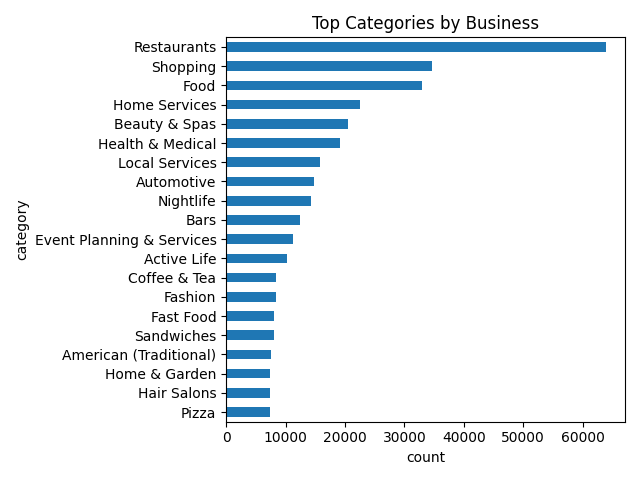

In [101]:
%matplot plt

## Do Yelp Reviews Skew Negative?

## Loading User Data

In [125]:
reviewsDF = spark.read.json('s3://sta9760-yelp-dataset-shuhan-liu/YelpReviews/*review.json')
reviewsDF.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [126]:
reviewsDF.select('business_id' ,'stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [127]:
averageReviewStars = reviewsDF.groupBy('business_id').avg('stars')
averageReviewStars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Join business data with average review stars.

In [109]:
joinedDF = df.join(averageReviewStars, 'business_id', 'inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
joinedDF.select('avg(stars)', 'stars', 'name', 'city', 'state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|        avg(stars)|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

In [112]:
skewDF = joinedDF.withColumn('skew', (joinedDF['avg(stars)'] - joinedDF['stars']) / joinedDF['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
skewDF.select('skew').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+
|summary|                skew|
+-------+--------------------+
|  count|              209393|
|   mean|0.001235344665268...|
| stddev| 0.05523522538149905|
|    min|-0.45454545454545453|
|    max|  1.3333333333333335|
+-------+--------------------+

In [114]:
skewDFPandas = skewDF.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [123]:
plt.clf()
ax = sns.distplot(skewDFPandas)
ax.set_title('Yelp User Reviews Skew')
plt.tight_layout()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

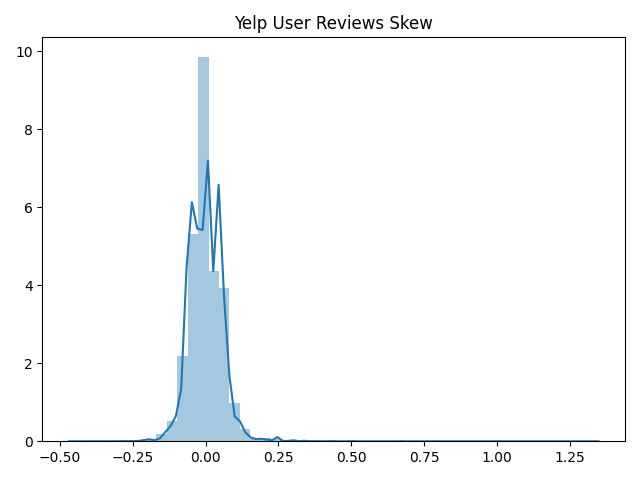

In [124]:
%matplot plt

### Do Yelp Reviews Skew Negative? --- Conclusions
Oftentimes, it is said that the only people whoe write a written review are those who are extremely dissatisfied with the service received. 
- The Yelp reviews data show that Yelp reviews skew *positive*. Specifically, the average written Yelp reviews tends to be higher than the business rating. The mean rating skew is positive (0.0012).
- This proves that written reviews do not skew negative. However, the skew is close to neutral. The mean skew of 0.0012 says that written reviews on average are only 0.1% higher than the Yelp business's rating.

## Should Elite be Trusted (Or, some other analysis of your choice)

### Load data

In [128]:
userDF = spark.read.json('s3://sta9760-yelp-dataset-shuhan-liu/YelpReviews/*user.json')
userDF.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [131]:
userDF.select('user_id', 'name', 'review_count', 'fans', 'cool', 'elite').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------+------------+----+----+--------------------+
|             user_id|    name|review_count|fans|cool|               elite|
+--------------------+--------+------------+----+----+--------------------+
|ntlvfPzc8eglqvk92...|  Rafael|         553|  14| 227|                    |
|FOBRPlBHa3WPHFB5q...|Michelle|         564|  27| 400|2008,2009,2010,20...|
|zZUnPeh2hEp0WydbA...|  Martin|          60|   5| 103|                2010|
|QaELAmRcDc5TfJEyl...|    John|         206|   6|  84|                2009|
|xvu8G900tezTzbbfq...|    Anne|         485|  78| 512|2009,2010,2011,20...|
+--------------------+--------+------------+----+----+--------------------+
only showing top 5 rows

In [133]:
userDF.filter(userDF['elite'] == '').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1892742

In [134]:
eliteUsersDF = userDF.filter(userDF['elite'] != '')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [142]:
eliteUserReviews = eliteUsersDF.join(reviewsDF, 'user_id', 'inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [137]:
eliteUserReviews.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable =

In [138]:
eliteUserReviews.select('user_id', 'business_id', 'review_id').orderBy('user_id', 'business_id').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+
|             user_id|         business_id|           review_id|
+--------------------+--------------------+--------------------+
|---1lKK3aKOuomHnw...|--9e1ONYQuAa-CB_R...|v8QPs6AaixrqXvC5r...|
|---1lKK3aKOuomHnw...|-ErwgUmZ1-jHW_rSu...|FlRoZ1T8QmS4gs3F4...|
|---1lKK3aKOuomHnw...|0YhT9HCBkU394IG6t...|Q8ax2kiz4SUJIKxOe...|
|---1lKK3aKOuomHnw...|1JgaRBX0oiRsvEhHF...|5ZLVbvlGiyoW9FzDF...|
|---1lKK3aKOuomHnw...|1Vn_lex3LGGwuTo-x...|Qd3uO4b77vkEo-djm...|
|---1lKK3aKOuomHnw...|29RwDZz9vU18VGiJc...|HLESEvL9CCjAnWv48...|
|---1lKK3aKOuomHnw...|2BbFeotL85cIaBjSq...|YYIAglOQmbto4z3LN...|
|---1lKK3aKOuomHnw...|2Cs9bSN-fMnY3H-0p...|3vDLddPhkHNAfn6TB...|
|---1lKK3aKOuomHnw...|2VNa2kbbt4o8nQmPK...|EfQXdxxXy_JuuELkM...|
|---1lKK3aKOuomHnw...|4RoTEeqB_MNn6yaqZ...|Var3KGOJp8sA4vGcM...|
|---1lKK3aKOuomHnw...|5FPQOwwPkBEiy8df8...|FzYG7dTZTU3TWf8-J...|
|---1lKK3aKOuomHnw...|5aeR9KcboZmhDZlFs...|3R2e-knpN5lCHu2LV...|
|---1lKK3aKOuomHnw...|5cb

In [143]:
eliteUserReviews = eliteUserReviews.withColumnRenamed('stars', 'elite_stars')
avgEliteStars = eliteUserReviews.groupBy('business_id').avg('elite_stars')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [145]:
eliteSkew = avgEliteStars.join(df, 'business_id', 'inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [146]:
eliteSkew.select('business_id', 'name', 'stars', 'avg(elite_stars)').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+------------------+
|         business_id|                name|stars|  avg(elite_stars)|
+--------------------+--------------------+-----+------------------+
|ipFreSFhjClfNETuM...|  Doogan's of Aurora|  2.5|3.0588235294117645|
|OyhCNhJJuJjUt2avx...|       Chocolate Bar|  3.0| 3.282051282051282|
|eKznX8VTfcQrjCqXp...|                Rasa|  4.5| 4.268817204301075|
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|  4.0|4.1916058394160585|
|-r8SvItXXG6_T3mP5...| Western Coffee Shop|  4.0|               3.5|
|GGxnlrfvWy7LFvjN5...|    UNA Pizza + Wine|  4.0| 4.216981132075472|
|1bPL4k_Ti8to01tI_...|    Showmars- Monroe|  3.0|               3.5|
|j2bx_ctb_ED3zbfSa...|        Roaring Fork|  4.0| 4.240282685512367|
|_ixV2SWDy7w8jzEAH...|    First Food & Bar|  3.5|3.7151898734177213|
|SjgeuBlgKER9yegpo...|        Nomé Izakaya|  4.0|3.8938775510204082|
|sb17pKkJKA3pjiYuN...|         Cha Me. Cha|  3.5|             3.625|
|RtUvSWO_UZ8V3Wpj0...|KINKA IZAKAY

In [148]:
eliteSkew = eliteSkew.withColumn('skew', (eliteSkew['avg(elite_stars)'] - eliteSkew['stars']) / eliteSkew['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [150]:
eliteSkew.select('skew').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|summary|               skew|
+-------+-------------------+
|  count|             148225|
|   mean|0.08830871734064806|
| stddev| 0.2913140301371416|
|    min|               -0.8|
|    max|                4.0|
+-------+-------------------+

In [149]:
eliteSkewPandas = eliteSkew.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [152]:
plt.clf()
ax = sns.distplot(eliteSkewPandas)
ax.set_title('Yelp Elite User Reviews Skew')
plt.tight_layout()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

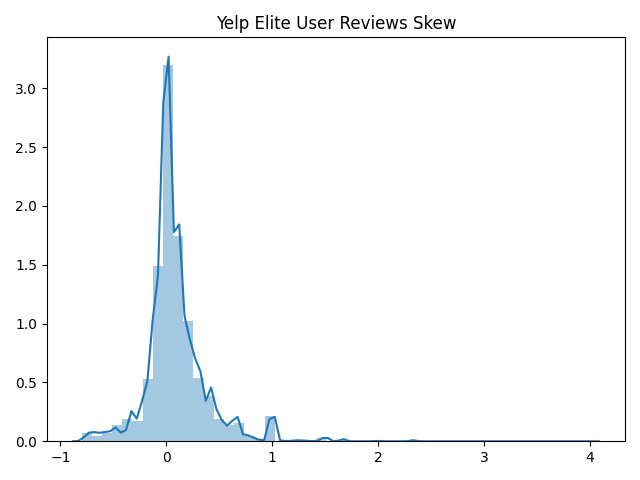

In [153]:
%matplot plt

### Should Elite Be Trusted? --- Conclusions
How accurate or close are the ratings of an "elite" user?
1. The Yelp user data shows that reviews written by "elite" users vary more widely than reviews written by general users.
2. "Elite" users tend to write reviews with higher ratings: 8% higher than the business rating for elite users compared to 0.1% for general users.
3. Because of 1 and 2, it's best not to rely on elite user reviews only.

I compared average ratings for general users and average ratings for elite users by looking at the rating skew distribution.

#### General users skew distribution:
mean: 0.0012
stddev: 0.0552

#### Elite users skew distribution
mean: 0.0883
stddev: 0.2913

The standard deviation for elite users is 6x the standard deviation for general users, which indicates that elite user reviews vary more widely than general user reviews. 

The mean skew of elite user ratings is 40x the mean for general users, indicating that elite users tend to give higher ratings than general users.